In [1]:
# Weeks 9 & 10 Exercises

In [2]:
# 1. The Data Wrangling Workshop: Activity 7.01, page 388
# Extracting the top 100 E-books from gutenberg

In [3]:
# Import the necessary libraries, including regex and BeautifulSong

In [4]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [5]:
# Read the HTML from the URL and pass on to BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

In [6]:
# Function to check the status of the web request
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [7]:
# Check the status of the response
status_check(response)

Success!


1

In [8]:
# Decode the response and pass it on the BeautifulSoup for the html parsing
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [9]:
# Find all the href tags and store them in the list of links

In [10]:
# Empty list to hold all the http links in the HTML page
lst_links=[]
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [11]:
# Check what the list looks like  - print the first 30 elements
lst_links[:30]


['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1']

In [12]:
# Initialize the empty list to hold the file numbers
booknum=[]

In [13]:
# Numbers 19 to 118 in the original list of links have the top 100 eBook's numbers.

In [14]:
# Loop over the appropriate range ans use a regex to find the numeric digits in the link href. use the findall methods.
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [15]:
# Print the file numbers
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 26184, 25558, 84, 2701, 1513, 1342, 11, 64317, 2542, 100, 145, 2641, 1952, 37106, 67979, 16389, 76, 1080, 345, 174, 25344, 844, 6761, 5200, 394, 43, 1400, 2160, 6593, 4085, 5197, 2554, 1259, 408, 50150, 1260, 57426, 75279, 3207, 1232, 98, 1727, 41445, 7370, 2000, 205, 6130, 1661, 75281, 1497, 768, 23, 1184, 16328, 15464, 219, 1998, 28054, 75282, 15399, 16119, 46, 2650, 19942, 4300, 132, 2591, 2600, 42324, 75285, 45, 55, 2814, 41, 75283, 3296, 45502, 4363, 74, 36034, 2148, 244, 996, 5740, 27761]


In [16]:
# use the .text method to print 2000 charecters
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Ways to donate







To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not considered.
Books made out o

In [17]:
# Temp empty list of Ebook names
lst_titles_temp=[]

In [18]:
# Creatinga  starting index. It should point at the text top 100 ebooks yesterday. Use the splitlines method of soup.text. 
#It splits the lines of the text of the soup object
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')


In [19]:
# Run the for loop from 1-100 to add strings of the next 100 lines to this temporary list
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [20]:
# Use regex to extract only text from the name strings and append them to an empty list. Use match and span to find indices
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [21]:
# Print the list of titles
for i in lst_titles:
    print(i)

Simple Sabotage Field Manual by United States

Frankenstein
Moby Dick
Romeo and Juliet by William Shakespeare 
Pride and Prejudice by Jane Austen 
Alice
The Great Gatsby by F
A Doll
The Complete Works of William Shakespeare by William Shakespeare 
Middlemarch by George Eliot 
A Room with a View by E
The Yellow Wallpaper by Charlotte Perkins Gilman 
Little Women
The Blue Castle
The Enchanted April by Elizabeth Von Arnim 
Adventures of Huckleberry Finn by Mark Twain 
A Modest Proposal by Jonathan Swift 
Dracula by Bram Stoker 
The Picture of Dorian Gray by Oscar Wilde 
The Scarlet Letter by Nathaniel Hawthorne 
The Importance of Being Earnest
The Adventures of Ferdinand Count Fathom 
Metamorphosis by Franz Kafka 
Cranford by Elizabeth Cleghorn Gaskell 
The Strange Case of Dr
Great Expectations by Charles Dickens 
The Expedition of Humphry Clinker by T
History of Tom Jones
The Adventures of Roderick Random by T
My Life 
Crime and Punishment by Fyodor Dostoyevsky 
Twenty years after by Ale

In [22]:
# 2. The Data Wrangling Workshop: Activity 7.02, page 390
# Building your own movie database by reading an API

In [23]:
import urllib.request, urllib.parse, urllib.error
import json

In [24]:
# Load the secret API key (you have to get one from the OMDB website and use that; it has a 1,000 daily limit) from a JSON file, stored in the same folder into a variable, by using json.loads().
# Note The following cell will not be executed in the solution notebook because the author cannot give out their private API key. The students/users/instructor will need to obtain a key and store it in a JSON file. We are calling this file APIkeys.json.

In [25]:
# Open APIkeys.json file to read the key
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [26]:
serviceurl = 'http://www.omdbapi.com/?'


In [27]:
apikey = '&apikey='+omdbapi

In [28]:
# print the movie data from a JSON file.
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [29]:
# function to download the poster movie based on the information from the JSON dataset and save it to local folder.
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [30]:
# Function to search a moview by its name.
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [31]:
#  Search the movie ith name "Titanic"
search_movie("Titanic")


Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=856a3424
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,322,762
imdbID: tt0120338
--------------------------------------------------


In [32]:
#  Search the movie ith name "Random_error"

search_movie("Random_error")


Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=856a3424
Error encountered:  Movie not found!


In [33]:
#3. Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.
#a. In previous versions of this course we have always used Twitter, but with recent organizational changes at Twitter, 
# it has become increasingly difficult to access the free APIs available at Twitter.
# You are more than welcome to try to use Twitter's API for this portion of the assignment, but please note, 
# there has been some inconsistency experienced when following along with their documentation posted.
#b. Connect to the API and do a "Get" call/operation on the API to return a subset of data from the API

In [34]:
# Fetch Weather Data via API
# This script:

# Fetches the weather for New York.
# Extracts temperature and weather conditions.
# Handles errors if the API request fails.

In [35]:
import requests

# Define API Key and Endpoint
api_key = "5789916fb6656a55cb71542f2c08fb38"
city = "New York"
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Construct the API request URL
url = f"{base_url}?q={city}&appid={api_key}&units=metric"

# Send a GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON response
    data = response.json()
    
    # Extract relevant information
    weather_info = {
        "City": data["name"],
        "Temperature (°C)": data["main"]["temp"],
        "Weather": data["weather"][0]["description"]
    }
    
    # Print extracted data
    print(weather_info)
else:
    print("Error fetching data. Check API key and city name.")


{'City': 'New York', 'Temperature (°C)': -0.02, 'Weather': 'clear sky'}


In [36]:
#4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. 
# You must submit via PDF along with your code if you are using Pycharm, otherwise if you submit a notebook file make sure your plots 
# are visible in your notebook or PDF that you submit. You are free to use Matplotlib, Seaborn or another package if you prefer.
#a. Line
#b. Scatter
#c. Bar
#d. Histogram
#e. Density Plot
#f. Pie Chart

In [37]:
# Explanation of Visualizations:
# Bar Chart – Compares obesity rates for males and females.
# Histogram – Shows the distribution of obesity percentages.
# Scatter Plot – Analyzes how sample size relates to obesity percentage.

In [38]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

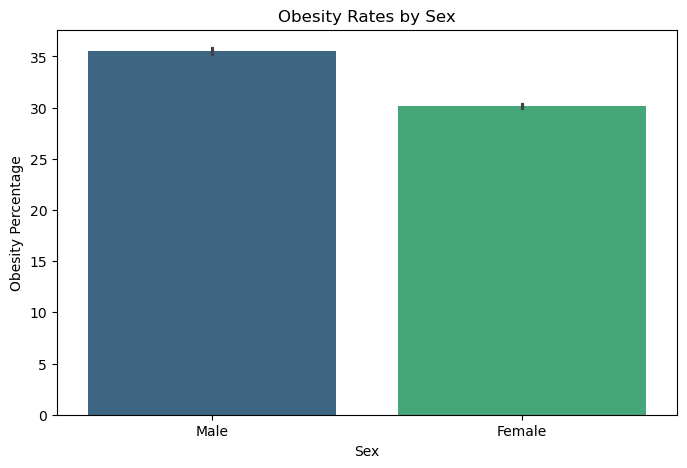

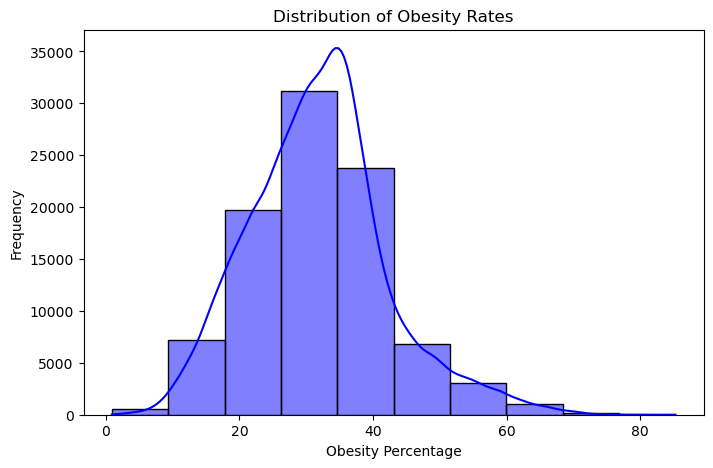

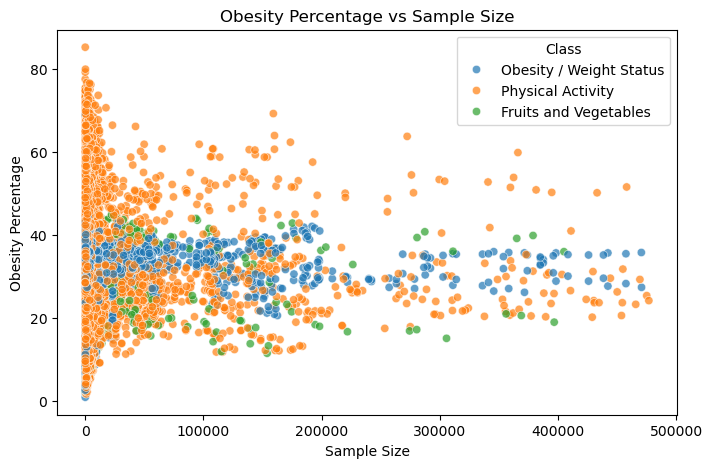

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("health_data.csv")  # Replace with actual file path

# Convert necessary columns
data["Data_Value"] = pd.to_numeric(data["Data_Value"], errors="coerce")
data["Sample_Size"] = pd.to_numeric(data["Sample_Size"], errors="coerce")

# Bar Chart: Obesity Rate by Sex
plt.figure(figsize=(8, 5))
sex_obesity = data[(data["Class"] == "Obesity / Weight Status") & (data["StratificationCategory1"] == "Sex")]
sns.barplot(x="Stratification1", y="Data_Value", data=sex_obesity, palette="viridis")
plt.title("Obesity Rates by Sex")
plt.xlabel("Sex")
plt.ylabel("Obesity Percentage")
plt.show()

# Histogram: Distribution of Obesity Rates
plt.figure(figsize=(8, 5))
sns.histplot(data["Data_Value"].dropna(), bins=10, kde=True, color="blue")
plt.title("Distribution of Obesity Rates")
plt.xlabel("Obesity Percentage")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot: Obesity Percentage vs Sample Size
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Sample_Size", y="Data_Value", data=data, hue="Class", alpha=0.7)
plt.title("Obesity Percentage vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Obesity Percentage")
plt.show()